In [209]:
import pyslim, msprime, tskit, random
import numpy as np
import matplotlib.pyplot as plt

#load tree sequence file, recapitate

ts = pyslim.load("/Users/alexanderwhitwam/Desktop/memory.trees")

ts = ts.recapitate(recombination_rate = 1e-8, Ne=500)
#ts = pyslim.SlimTreeSequence(msprime.mutate(ts, rate=1e-7))

In [210]:
#sample ten individuals from present day

samps = random.sample(sorted(ts.individuals_alive_at(0)), 5)
snodes = []
for i in range(len(samps)):
    snodes.append(ts.individuals()[samps[i]].nodes[0])
    snodes.append(ts.individuals()[samps[i]].nodes[1])

In [211]:
ts.simplify(snodes)

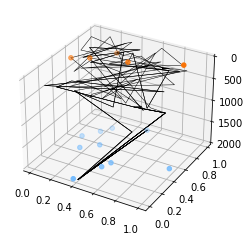

In [222]:
first = ts.first()

lists = []
for n in snodes:
    ind = ts.node(n).individual
    x = [ts.individual(ind).location[0]]
    y = [ts.individual(ind).location[1]]
    z = [ts.individual(ind).time]
    while first.parent(n) != tskit.NULL:
        n = first.parent(n)
        indi = ts.node(n).individual
        if indi != -1:
            x.append(ts.individual(indi).location[0])
            y.append(ts.individual(indi).location[1])
            z.append(ts.individual(indi).time)
    lists.append([x, y, z])
    
xan = []
yan = []
zan = []
for i in ts.individuals_alive_at(1999):
    xan.append(ts.individual_locations[i][0])
    yan.append(ts.individual_locations[i][1])
    zan.append(ts.individual_times[i])
    
xde = []
yde = []
zde = []
for i in samps:
    xde.append(ts.individual_locations[i][0])
    yde.append(ts.individual_locations[i][1])
    zde.append(ts.individual_times[i])
    
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_zlim([2000, 0])

for i in range(len(lists)):
    ax.plot(lists[i][0], lists[i][1], zs=lists[i][2], color="black", linewidth=0.5)

ax.scatter3D(xan, yan, zan, color="xkcd:sky blue")
ax.scatter3D(xde, yde, zde, color="xkcd:orange")